<a href="https://colab.research.google.com/github/Dimas0824/Machine_Learning/blob/main/Jobsheet_7/TUGAS_WEEK9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

Tugas Praktikum: Multiple Linear Regression dengan Dataset Medical Cost Personal Datasets

Instruksi Umum:

1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

## PERSIAPAN DATA UNTUK MODEL

In [123]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset ini memiliki 7 kolom dengan total 1338 baris data. Jika tidak menghitung index maka terdapat 6 fitur. Fitur numerik adalah age, bmi, children, dan charges. Fitur kategorikal adalah sex, smoker, dan region. Dataset bersih karena tidak ditemukan nilai null maupun NaN, sehingga bisa langsung diolah lebih lanjut.

In [124]:
# load dataset dan cek dataset
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/DATASET/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [125]:
print(data.shape)
print(data.info())
print(data.describe())

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.

In [126]:
print(data.isnull().sum())
print(data.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Langkah berikutnya adalah melihat histogram sebaran data untuk menentukan metode encoding dan scaling yang sesuai.
1. Encoding
  - OneHotEncoder → cocok untuk variabel kategorikal tanpa urutan, seperti sex, smoker, region (low cardinality).
  - LabelEncoder → hanya dipakai jika kategorinya memang punya urutan logis (high cardinality).
2. Scaling
  - StandardScaler → untuk data numerik dengan distribusi mendekati normal, misalnya age dan bmi.
  - RobustScaler → lebih tepat jika ada outlier besar.
  - MinMaxScaler → dipakai jika butuh semua fitur dalam rentang 0–1, misalnya untuk neural network.
  - Power/Log Transform + StandardScaler → untuk data numerik yang sangat skewed, seperti charges.


   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400       0.0         1.0               0.0   
1   18  33.770         1   1725.55230       1.0         0.0               0.0   
2   28  33.000         3   4449.46200       1.0         0.0               0.0   
3   33  22.705         0  21984.47061       1.0         0.0               1.0   
4   32  28.880         0   3866.85520       1.0         0.0               1.0   

   region_southeast  region_southwest  
0               0.0               1.0  
1               1.0               0.0  
2               1.0               0.0  
3               0.0               0.0  
4               0.0               0.0  


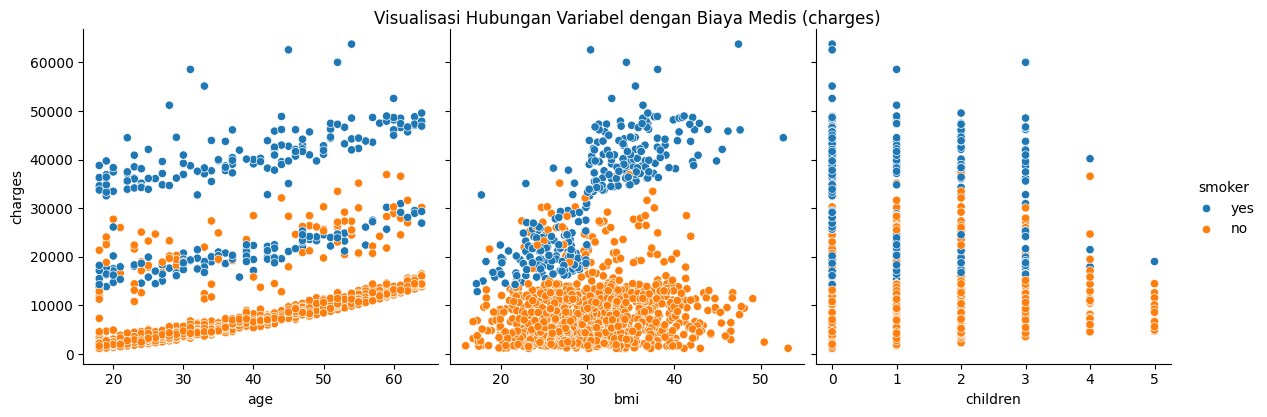

In [127]:
from sklearn.preprocessing import OneHotEncoder

# Encode kolom kategorikal
categorical_cols = ['sex', 'smoker', 'region']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(data[categorical_cols])

# Gabungkan hasil encode
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))
data_encoded = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)

# Tampilkan hasil encoding
print(data_encoded.head())

# Visualisasi hubungan variabel dengan charges
sns.pairplot(
    data=data,
    x_vars=['age', 'bmi', 'children'],
    y_vars='charges',
    hue='smoker',
    height=4,
    aspect=1,
    kind='scatter'
)
plt.suptitle("Visualisasi Hubungan Variabel dengan Biaya Medis (charges)", y=1.02)
plt.show()

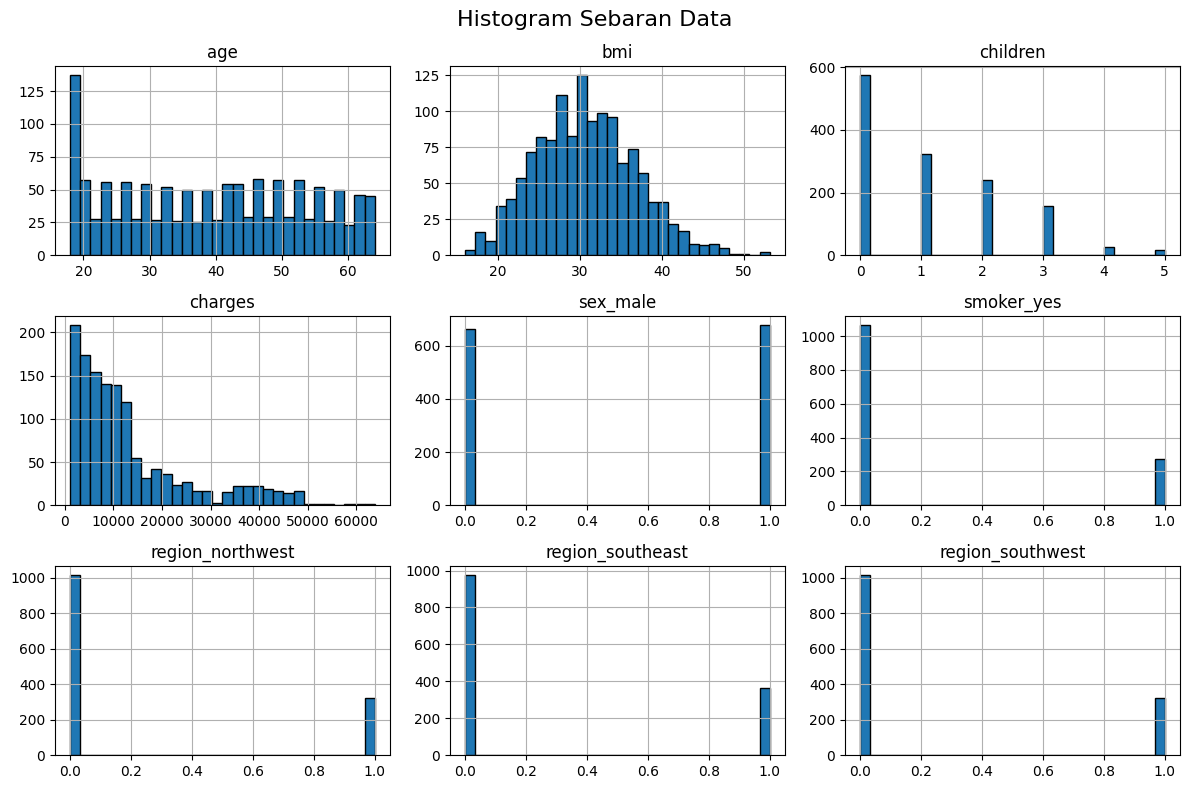

In [128]:
# histogram sebaran data
numeric_cols = data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Plot histogram untuk setiap kolom numerik
data_encoded[numeric_cols].hist(
    bins=30, figsize=(12, 8), edgecolor='black'
)

plt.suptitle("Histogram Sebaran Data", fontsize=16)
plt.tight_layout()
plt.show()

In [129]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = data_encoded.drop(columns=['charges'])
y = data_encoded['charges'].values.reshape(-1, 1)

# Split data jadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Ukuran data training:", X_train.shape)
print("Ukuran data testing :", X_test.shape)

Ukuran data training: (1070, 8)
Ukuran data testing : (268, 8)


In [130]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

# StandardScaler untuk distribusi normal/uniform
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train[['age', 'bmi']])
X_test_std = scaler_std.transform(X_test[['age', 'bmi']])

# MinMaxScaler untuk fitur diskrit kecil
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train[['children']])
X_test_mm = scaler_mm.transform(X_test[['children']])

# Gabungkan kolom yang tidak di-scale (kategori biner)
X_train_other = X_train.drop(columns=['age', 'bmi', 'children']).reset_index(drop=True)
X_test_other = X_test.drop(columns=['age', 'bmi', 'children']).reset_index(drop=True)

# Gabung hasil scaling jadi satu dataframe (global scaling)
import numpy as np
X_train_scaled = np.concatenate([X_train_std, X_train_mm, X_train_other], axis=1)
X_test_scaled = np.concatenate([X_test_std, X_test_mm, X_test_other], axis=1)

# Scaling target (charges)
scaler_y = PowerTransformer(method='yeo-johnson')
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

## PELATIHAN MODEL

1. Multiple Linear Regression
2. SVR

### MULTIPLE LINEAR REGRESSION

Model Multiple Linear Regression mampu menjelaskan sekitar 66,7% variasi charges (R² = 0.6674). Rata-rata kesalahan prediksi absolutnya sekitar 3.700 (MAE), dengan RMSE sebesar 7.185 yang menunjukkan adanya deviasi cukup besar antara nilai aktual dan prediksi. Nilai sMAPE 25,77% juga menandakan tingkat kesalahan relatif masih cukup tinggi. Hal ini menunjukkan bahwa meskipun model sudah menangkap pola utama dalam data, akurasinya masih terbatas sehingga diperlukan perbaikan atau penggunaan model alternatif yang lebih fleksibel.


In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Buat model regresi linear
model = LinearRegression()

# Latih model
model.fit(X_train_scaled, y_train_scaled)

# Prediksi data test
y_pred_scaled = model.predict(X_test_scaled)

# Kembalikan hasil ke skala asli
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Evaluasi model
r2 = r2_score(y_test_original, y_pred)
rmse = np.sqrt(mse)  # Tambahkan RMSE agar sama dengan SVR
mae = mean_absolute_error(y_test_original, y_pred)
smape = 100 * np.mean(
    2 * np.abs(y_pred - y_test_original) / (np.abs(y_test_original) + np.abs(y_pred))
)

print("=== Evaluasi Multiple Linear Regression ===")
print(f"R² Score     : {r2:.4f}")
print(f"RMSE         : {rmse:.2f}")
print(f"MAE          : {mae:.4f}")
print(f"sMAPE        : {smape:.2f}%")

=== Evaluasi Multiple Linear Regression ===
R² Score     : 0.6674
RMSE         : 7185.64
MAE          : 3706.3755
sMAPE        : 25.77%


dari visual dibawah ini mengenai model yang telah dilatih dapat di jelaskan:
1. Plot aktual vs prediksi menunjukkan titik-titik cukup mengikuti garis ideal, tetapi masih menyebar terutama pada nilai charges tinggi, sehingga prediksi model cenderung kurang akurat pada kasus biaya yang ekstrem.
2. Residual plot memperlihatkan sebaran error yang tidak sepenuhnya acak, masih ada pola dan outlier, menandakan model linear belum sepenuhnya menangkap kompleksitas data.
3. Koefisien regresi menunjukkan variabel smoker memiliki pengaruh paling besar terhadap biaya medis, diikuti oleh age, children, dan bmi, sedangkan variabel region dan sex relatif kecil kontribusinya bahkan menunjukkan nilai minus.


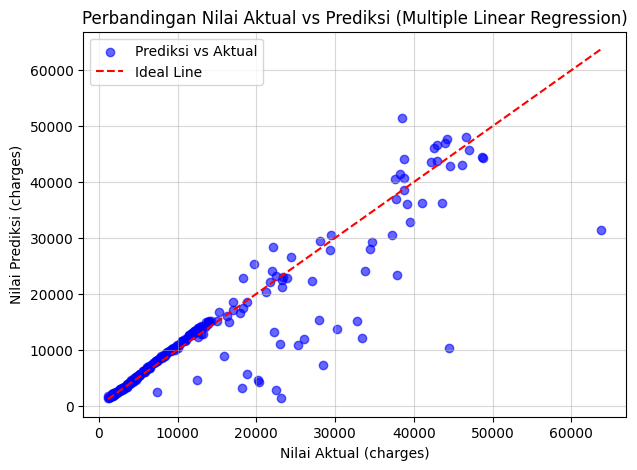

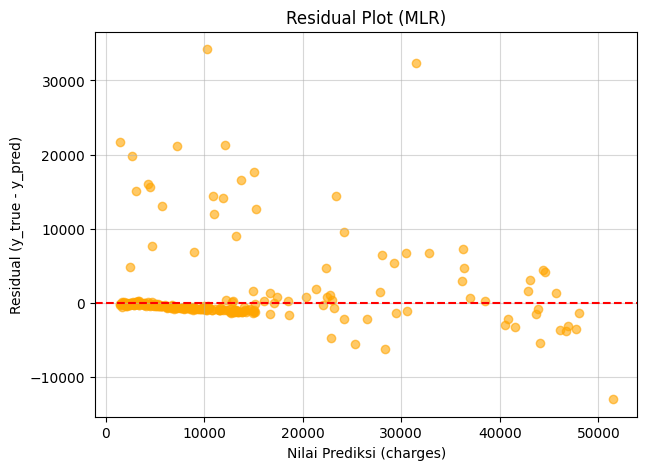

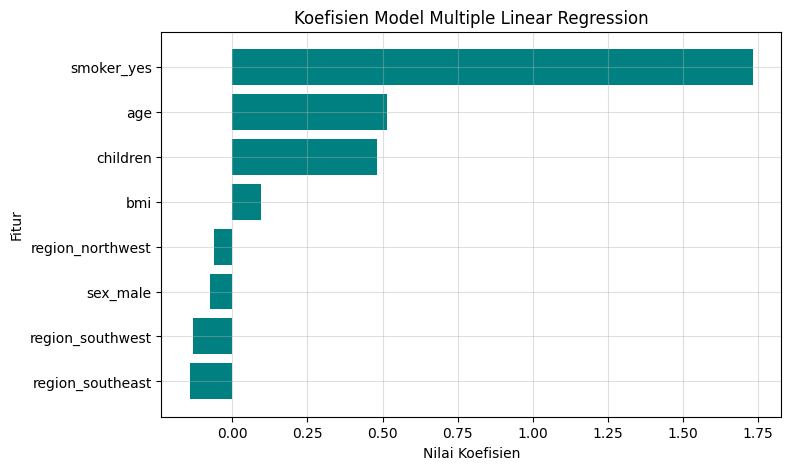

In [137]:
plt.figure(figsize=(7,5))
plt.scatter(y_test_original, y_pred, color='blue', alpha=0.6, label="Prediksi vs Aktual")
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         color='red', linestyle='--', label="Ideal Line")
plt.title("Perbandingan Nilai Aktual vs Prediksi (Multiple Linear Regression)")
plt.xlabel("Nilai Aktual (charges)")
plt.ylabel("Nilai Prediksi (charges)")
plt.legend()
plt.grid(alpha=0.5)
plt.show()
print()

# Visualisasi 2: Residual Plot
residuals = y_test_original - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot (MLR)")
plt.xlabel("Nilai Prediksi (charges)")
plt.ylabel("Residual (y_true - y_pred)")
plt.grid(alpha=0.5)
plt.show()
print()

# Visualisasi 3: Koefisien Regresi (Feature Importance)
from sklearn.linear_model import LinearRegression
mlr_model = LinearRegression()
mlr_model.fit(X_train_scaled, y_train_scaled)


coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': mlr_model.coef_.flatten()
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='teal')
plt.title("Koefisien Model Multiple Linear Regression")
plt.xlabel("Nilai Koefisien")
plt.ylabel("Fitur")
plt.gca().invert_yaxis()
plt.grid(alpha=0.4)
plt.show()
print()

### SVR (Support Vector Regression)

In [133]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# latih model SVR
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train_scaled.ravel())


SVR()

Pada model SVR ini menunjukkan performa yang cukup bagus dengan R² sebesar 0.82, artinya sekitar 82% variasi biaya medis dapat dijelaskan oleh model. Nilai RMSE ≈ 5285 dan MAE ≈ 2203 menandakan rata-rata kesalahan prediksi masih ada, namun relatif lebih kecil dibanding variasi data. Sementara itu, sMAPE 14.55% menunjukkan tingkat kesalahan persentase yang tergolong cukup baik.


Pada visualisasi prediksi SVR menunjukkan bahwa:
1. Pada age vs charges, kurva prediksi mengikuti tren kenaikan biaya seiring bertambahnya usia.
2. Pada bmi vs charges, terlihat pola kenaikan biaya pada nilai BMI yang lebih tinggi, terutama untuk kasus tertentu.
3. Pada children vs charges, pengaruhnya relatif kecil, kurva prediksi cenderung datar.

Lalu pada visualisasi perbandingan nilai aktual dan prediksi dengan SVR menunjukkan bahwa model sudah cukup baik mengikuti pola data, namun masih ada penyebaran titik yang menjauh dari garis ideal terutama pada nilai charges tinggi.



=== Evaluasi Model SVR ===
R² Score   : 0.8201
RMSE       : 5285.17
MAE        : 2203.35
sMAPE      : 14.55%



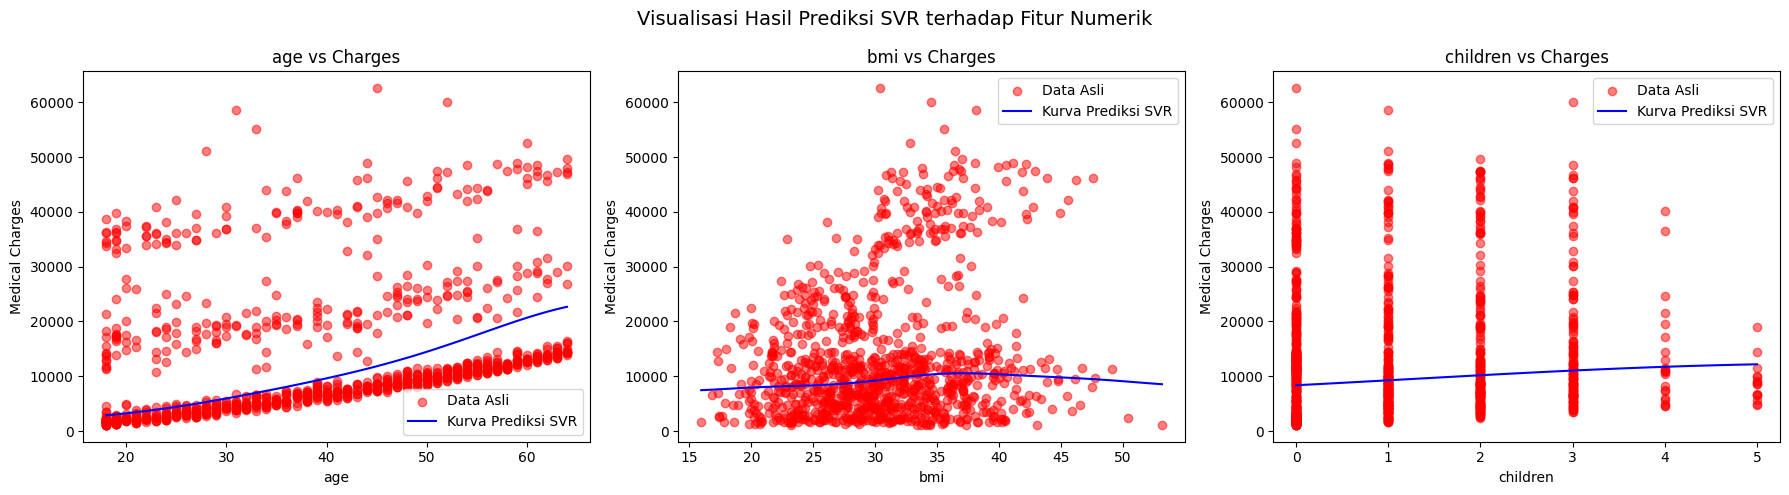

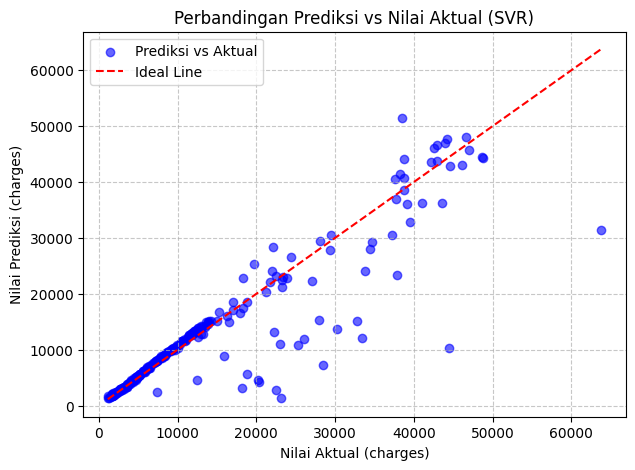

In [134]:
# VISUALISASI FITUR NUMERIK
features = ['age', 'bmi', 'children']
fig, axes = plt.subplots(1, len(features), figsize=(6 * len(features), 5))

if len(features) == 1:
    axes = [axes]

for ax, feature in zip(axes, features):
    # Ambil data asli (belum diskalakan)
    X_plot = X_train[[feature]].values
    y_plot = scaler_y.inverse_transform(y_train_scaled)

    # Grid nilai untuk fitur yang sedang divisualisasi
    X_grid = np.linspace(X_plot.min(), X_plot.max(), 100).reshape(-1, 1)

    # Buat DataFrame grid, fitur lain = mean
    X_grid_df = pd.DataFrame(
        X_train.mean().values.reshape(1, -1).repeat(len(X_grid), axis=0),
        columns=X_train.columns
    )
    X_grid_df[feature] = X_grid.flatten()

    # Transformasi sesuai skema scaling
    X_grid_std = scaler_std.transform(X_grid_df[['age', 'bmi']])
    X_grid_mm = scaler_mm.transform(X_grid_df[['children']])
    X_grid_other = X_grid_df.drop(columns=['age', 'bmi', 'children']).reset_index(drop=True)
    X_grid_scaled = np.concatenate([X_grid_std, X_grid_mm, X_grid_other], axis=1)

    # Prediksi pada grid
    y_pred_scaled = model.predict(X_grid_scaled).reshape(-1, 1)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    # Plot hubungan fitur dengan charges
    ax.scatter(X_plot, y_plot, color='red', alpha=0.5, label='Data Asli')
    ax.plot(X_grid, y_pred, color='blue', label='Kurva Prediksi SVR')
    ax.set_title(f'{feature} vs Charges')
    ax.set_xlabel(feature)
    ax.set_ylabel('Medical Charges')
    ax.legend()

# EVALUASI MODEL
y_pred_scaled = model.predict(X_test_scaled).reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = y_test.reshape(-1, 1)  # data asli, belum diskalakan

r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

print("\n=== Evaluasi Model SVR ===")
print(f"R² Score   : {r2:.4f}")
print(f"RMSE       : {rmse:.2f}")
print(f"MAE        : {mae:.2f}")
print(f"sMAPE      : {smape:.2f}%")
print()

plt.suptitle("Visualisasi Hasil Prediksi SVR terhadap Fitur Numerik", fontsize=14)
plt.tight_layout()
plt.show()
print()

# VISUALISASI PREDIKSI VS AKTUAL
plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, alpha=0.6, color='blue', label="Prediksi vs Aktual")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Ideal Line')
plt.title("Perbandingan Prediksi vs Nilai Aktual (SVR)")
plt.xlabel("Nilai Aktual (charges)")
plt.ylabel("Nilai Prediksi (charges)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [142]:
def prediksi_biaya(age, bmi, children, sex_male, smoker_yes, region_northwest, region_southeast, region_southwest):
    # 1. Buat DataFrame input sesuai urutan kolom aslinya
    sample = pd.DataFrame([{
        'age': age,
        'bmi': bmi,
        'children': children,
        'sex_male': sex_male,
        'smoker_yes': smoker_yes,
        'region_northwest': region_northwest,
        'region_southeast': region_southeast,
        'region_southwest': region_southwest
    }])[X_train.columns]

    # 2. Terapkan scaling sesuai tipe fitur
    sample_std = scaler_std.transform(sample[['age', 'bmi']])
    sample_mm = scaler_mm.transform(sample[['children']])
    sample_other = sample.drop(columns=['age', 'bmi', 'children']).reset_index(drop=True)

    # Gabungkan hasil scaling
    sample_scaled = np.concatenate([sample_std, sample_mm, sample_other], axis=1)

    # 3. Prediksi dengan model
    pred_scaled = model.predict(sample_scaled).reshape(-1, 1)
    pred_asli = scaler_y.inverse_transform(pred_scaled)
    hasil = pred_asli[0][0]

    # 4. Visualisasi terhadap fitur 'age'
    feature = 'age'
    X_plot = np.linspace(X_train[feature].min(), X_train[feature].max(), 100).reshape(-1, 1)

    # Buat DataFrame grid (fitur lain = mean)
    X_grid_df = pd.DataFrame(
        X_train.mean().values.reshape(1, -1).repeat(len(X_plot), axis=0),
        columns=X_train.columns
    )
    X_grid_df[feature] = X_plot.flatten()

    # Scaling grid sesuai pipeline
    X_grid_std = scaler_std.transform(X_grid_df[['age', 'bmi']])
    X_grid_mm = scaler_mm.transform(X_grid_df[['children']])
    X_grid_other = X_grid_df.drop(columns=['age', 'bmi', 'children']).reset_index(drop=True)
    X_grid_scaled = np.concatenate([X_grid_std, X_grid_mm, X_grid_other], axis=1)

    # Prediksi untuk grid
    y_pred_scaled = model.predict(X_grid_scaled).reshape(-1, 1)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    # Plot hasil
    plt.figure(figsize=(7, 5))
    plt.scatter(X_train[feature], scaler_y.inverse_transform(y_train_scaled),
                color='red', label='Data Asli', alpha=0.6)
    plt.plot(X_plot, y_pred, color='blue', label='Kurva Prediksi SVR')
    plt.scatter(age, hasil, color='green', s=100, label='Prediksi Baru', edgecolors='black')
    plt.title("(SVR) — Validasi Hasil Prediksi")
    plt.xlabel("Usia (age)")
    plt.ylabel("Biaya Medis (charges)")
    plt.legend()
    plt.show()

    # 5. Kembalikan hasil numerik
    print(f"Prediksi Biaya Medis (charges) untuk pasien ini: ${hasil:,.2f}")
    return hasil

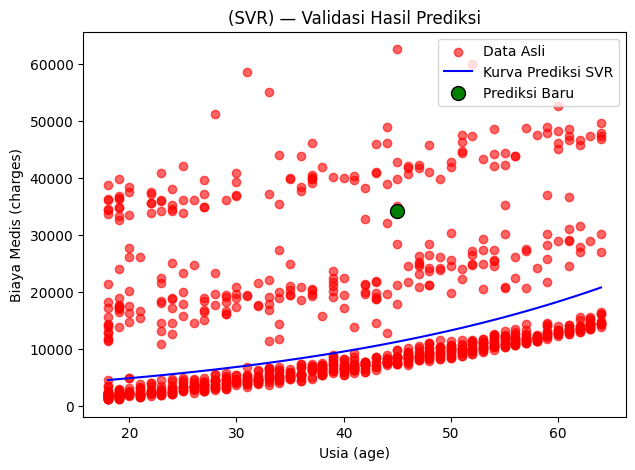

Prediksi Biaya Medis (charges) untuk pasien ini: $34,148.49
34148.489417872384


In [143]:
print(prediksi_biaya(45, 25, 2, 1, 1, 0, 1, 0))


## Kesimpulan
| Model                     | R² Score |  RMSE   |   MAE   | sMAPE   |
|---------------------------|:--------:|--------:|--------:|--------:|
| Multiple Linear Regression|  0.6674  | 7185.64 | 3706.38 | 25.77%  |
| Support Vector Regression |  0.8201  | 5285.17 | 2203.35 | 14.55%  |


Berdasarkan hasil evaluasi, SVR menunjukkan performa yang lebih baik dibanding MLR hampir pada semua metrik. Nilai R² SVR sebesar (0.8201) lebih tinggi daripada MLR (0.6674), menandakan SVR mampu menjelaskan variasi data lebih besar. Dari sisi kesalahan, RMSE SVR (5285.17) lebih rendah dibanding MLR (7185.64), begitu juga dengan MAE SVR (2203.35) yang lebih kecil daripada MLR (3706.38). Selain itu, sMAPE SVR (14.55%) jauh lebih rendah dibanding MLR (25.77%), menunjukkan tingkat kesalahan relatif SVR lebih kecil.

Secara keseluruhan, perbandingan metrik ini menegaskan bahwa SVR lebih akurat dan stabil dalam memprediksi biaya medis dibandingkan MLR.
